# Benford's Law

## Exploring the Mysteries of Numbers: The Story of Benford's Law

Imagine stepping back in time to the early 20th century, a world without calculators or computers, where scientists and engineers relied on thick volumes of logarithm tables for their calculations. It was during this era that physicist Frank Benford, working at General Electric, noticed something peculiar: the first pages of these logarithm books, containing numbers starting with smaller digits, were more worn out than the last pages. This observation echoed an earlier, overlooked discovery by astronomer Simon Newcomb in 1881.

Contrary to intuition, which suggests that the first digit of any number should follow a uniform distribution, with each digit from 1 to 9 having an equal chance of appearing, Benford found a different reality. He discovered that in many natural phenomena, the probability of the first digit being a certain number follows a logarithmic law. For example, the chance of the first digit being 1 is about 30.1%, while the chance of it being 9 is only 4.6%.

But why do digits form this distribution? The answer lies in the nature of logarithmic scales. In a logarithmic distribution, there are more numbers starting with lower digits than with higher digits. This pattern is observed not just in numbers related to natural phenomena but also in various datasets like Twitter followers or Stack Overflow user reputation.

Now, let's embark on a journey to two imaginary countries: Mediocreland and Extremeland. In Mediocreland, data follows a normal distribution, like the heights of employees in an organization. In Extremeland, however, data follows a potential distribution, where a single observation can significantly influence the total. Wealth distribution and social media followers are examples of data from Extremeland.

Benford's Law applies to datasets from Extremeland, which are large, span multiple orders of magnitude, and exhibit scale invariance. These datasets must consist of positive numbers, be free of minimum or maximum values, and not be composed of assigned numbers like telephone numbers or postcodes. They should also be transactional, like sales or refunds.

So, how is Benford's Law useful? It's a powerful tool for **detecting fraud**, **manipulation**, and **network attacks**. For example, financial accounts, stock prices, and customer refunds often follow Benford's Law. Deviations from the law can indicate fabricated data, as seen in Ponzi schemes like the Madoff scam. The law has also been used in image steganalysis, election data analysis, and detecting anomalies in drug discovery data.

In the realm of cybersecurity, Benford's Law has been employed to detect internet traffic anomalies, such as DDoS attacks, by analyzing packet inter-arrival times. The beauty of this anomaly-based detection method is its simplicity and efficiency, requiring no deep packet inspection or learning, and it remains effective even with encrypted packet content.

As we delve into the world of cybersecurity, let's remember to consider whether the first digit of numbers in a dataset follows Benford's Law. This simple yet profound observation might reveal unexpected anomalies and help us uncover the hidden stories behind the numbers.

## Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install --upgrade yfinance
import yfinance as yf
import seaborn as sns
yf.__version__

'0.2.54'

In [5]:
# When you need to upgrade a package, use the additional option '--upgrade'
#!pip install --upgrade yfinance
#import yfinance as yf
#yf.__version__

## Define Benford's Law Function:
This function calculates the expected distribution of first digits according to Benford's Law.

In [8]:
def benfords_law(digit):
    return np.log10(1 + 1/digit)

## Prepare Your Data:
Load your dataset and extract the first digits. For example, if you have a list of numbers:

In [9]:
# Option A: Your dataset
data = [123, 456, 789, 101112, 131415, 123, 38, 393, 929, 1029, 3399, 3939, 393, 9292] 

In [24]:
# Option b: Load the tips dataset and use, for example, the 'total_bill' column for analysis
tips_data = sns.load_dataset('tips')
data = tips_data['total_bill'].tolist()

In [11]:
# Option C: Stock price data from Yahoo Finance:
# For detailed documentation and examples please refer to https://ranaroussi.github.io/yfinance/index.html
data = yf.download("AAPL", start='2020-01-01', end='2024-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


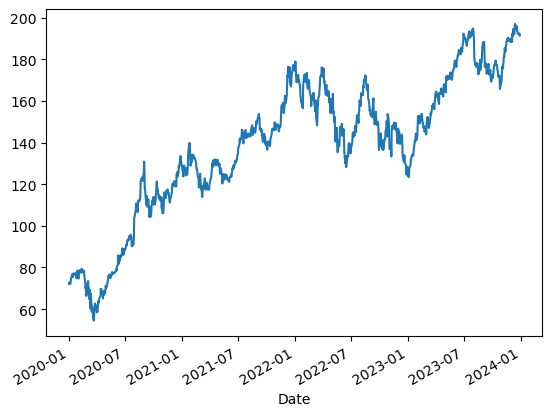

In [13]:
data["AAPL"].plot();

In [15]:
data=data["AAPL"].tolist()

In [28]:
# Option D: For cross-sectional data, you can use a dataset that includes a snapshot of various financial metrics 
# for different companies at a specific point in time. One such dataset is the "500_Companies.csv" dataset, 
# which contains financial data for companies in the S&P 500 index.
url = "data/constituents-financials.csv" # "https://github.com/datasets/s-and-p-500-companies-financials/blob/main/data/constituents-financials.csv"
companies_data = pd.read_csv(url)
data = companies_data['Market Cap'].dropna().tolist()

In [30]:
len(data)

505

### Extract the first digits

In [33]:
first_digits = [int(str(number)[0]) for number in data if number > 0]

## Calculate Actual Distribution:
Count the occurrences of each first digit in your dataset.

In [36]:
digit_counts = pd.Series(first_digits).value_counts().sort_index()

## Calculate Expected Distribution:
Apply Benford's Law to get the expected distribution.

In [39]:
expected_counts = [benfords_law(digit) * len(first_digits) for digit in range(1, 10)]

## Compare Distributions:
Visualize the actual and expected distributions to compare them.

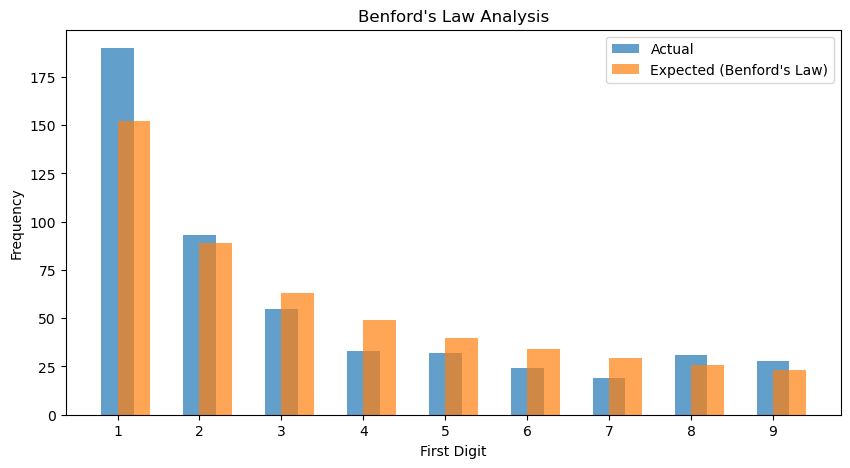

In [42]:
plt.figure(figsize=(10, 5))
plt.bar(digit_counts.index, digit_counts.values, label='Actual', alpha=0.7, width=0.4, align='center')
plt.bar(range(1, 10), expected_counts, label='Expected (Benford\'s Law)', alpha=0.7, width=0.4, align='edge')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Benford\'s Law Analysis')
plt.legend()
plt.xticks(range(1, 10))
plt.show()

## Interpret the Results:
Compare the actual and expected distributions to see if your data conforms to Benford's Law. Significant deviations may indicate anomalies or potential fraud.

This is a basic implementation. Depending on your data and requirements, you might need to adjust the code, especially the data preparation step. For more sophisticated analysis, you can perform statistical tests to quantify the conformity of your data to Benford's Law.

## Interactive on-line component
https://testingbenfordslaw.com/